### Import

In [4768]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Features e insights

Os componentes de um passeio aleatório — sentido e magnitude — podem estar representados de forma composta, como uma única entidade, ou decomposta, como variáveis separadas.

**Sentido**

- Pode assumir valores discretos no conjunto {−1, 0, 1}.  
- A distribuição de probabilidade associada ao sentido determina a direção predominante do passeio aleatório, indicando se sua tendência será crescente, decrescente ou estável.

**Magnitude**

- Pode ser representada como um valor percentual ou absoluto, assumindo apenas valores estritamente positivos.  
- A distribuição de probabilidade da magnitude determina a escala ou intensidade das variações, influenciando a taxa de mudança ao longo do passeio aleatório.  
- Mesmo que a distribuição de probabilidade do sentido indique uma tendência de queda, o passeio aleatório pode apresentar crescimento se as magnitudes associadas ao crescimento (sentido = 1) forem significativamente maiores que as do decrescimento (sentido = -1). O inverso também é verdadeiro.

### Random walk

Random walk pelo valor percentual

#### Components

##### Sense

In [4769]:
sense = [-1, 0, 1]

sense_distribuition = [0.40, 0.15, 0.45]
# sense_distribuition = None

##### Magnitude

-1

In [4770]:
magnitude_minus_one = [0.01, 0.02, 0.03]

magnitude_distribution_minus_one = [0.70, 0.25, 0.05]
# magnitude_distribution_minus_one = None

0

In [4771]:
magnitude_zero = [0]

magnitude_distribution_zero = [1.00]
# magnitude_distribution_zero = None

+1

In [4772]:
magnitude_plus_one = [0.015, 0.016, 0.017, 0.018, 0.019]

magnitude_distribution_plus_one = [0.50, 0.25, 0.125, 0.0625, 0.0625]
# magnitude_distribution_plus_one = None

#### Random walk with probability distribution

##### Size

In [4773]:
size = 1_000

##### Choice senses

In [4774]:
senses = np.random.choice(a=sense, size=size, replace=True, p=sense_distribuition)
senses[0:20]

array([ 1, -1, -1,  1,  1,  1,  1,  0,  0, -1,  1,  0,  1,  0, -1,  0,  1,
        0,  1,  1])

In [4775]:
# unique_values, counts = np.unique(senses, return_counts=True)
# counts/counts.sum()

##### Choice magnitudes

In [4776]:
_, counts = np.unique(senses, return_counts=True)

magnitudes_minus_one = np.random.choice(a=magnitude_minus_one, size=counts[0], replace=True, p=magnitude_distribution_minus_one)
magnitudes_zero = np.random.choice(a=magnitude_zero, size=counts[1], replace=True, p=magnitude_distribution_zero)
magnitudes_plus_one = np.random.choice(a=magnitude_plus_one, size=counts[2], replace=True, p=magnitude_distribution_plus_one)

In [4777]:
magnitudes = np.zeros(shape=(len(senses)))

magnitudes[(senses == -1)] = magnitudes_minus_one
magnitudes[(senses == 0)] = magnitudes_zero
magnitudes[(senses == 1)] = magnitudes_plus_one

magnitudes[0:20]

array([0.015, 0.01 , 0.01 , 0.015, 0.018, 0.015, 0.016, 0.   , 0.   ,
       0.01 , 0.017, 0.   , 0.015, 0.   , 0.01 , 0.   , 0.018, 0.   ,
       0.018, 0.017])

In [4778]:
# unique_values, counts = np.unique(magnitudes, return_counts=True)
# counts/counts.sum()

##### Signed magnitude

In [4779]:
signed_magnitude = senses * magnitudes
signed_magnitude[0:20]

array([ 0.015, -0.01 , -0.01 ,  0.015,  0.018,  0.015,  0.016,  0.   ,
        0.   , -0.01 ,  0.017,  0.   ,  0.015,  0.   , -0.01 ,  0.   ,
        0.018,  0.   ,  0.018,  0.017])

##### Initial point

In [4780]:
rng = np.random.default_rng()

initial_point = rng.integers(low=35, high=150, size=1)
initial_point

array([117], dtype=int64)

##### Random walk

In [4781]:
random_walk = signed_magnitude
random_walk[0] = 0
random_walk = 1 + random_walk
random_walk = random_walk.cumprod()
random_walk = initial_point * random_walk

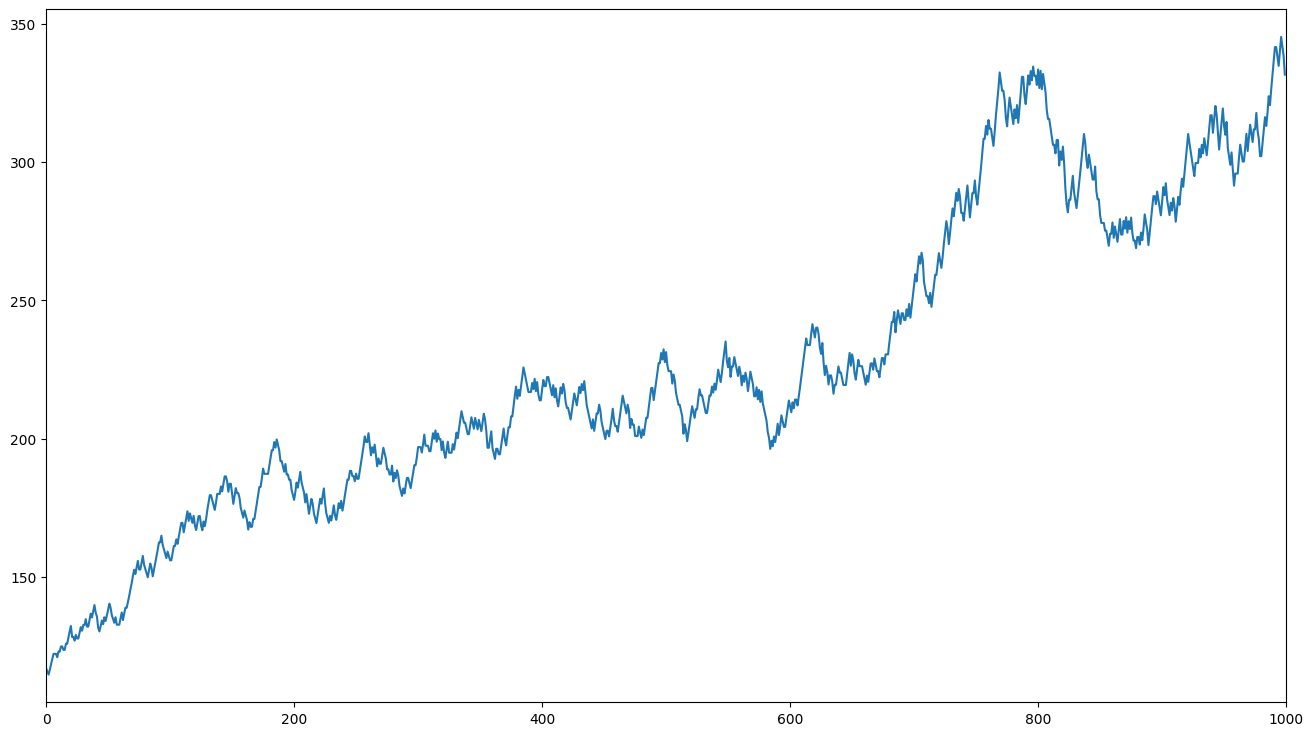

In [4782]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.set_xlim(xmin=0, xmax=size)
ax.set_ylim(ymin=random_walk.min() - 10, ymax=random_walk.max() + 10)
ax.plot(random_walk)

plt.show()

### Random walk

Random walk pelo valor absoluto

#### Components

##### Sense

In [4783]:
sense = [-1, 0, 1]

sense_distribuition = [0.40, 0.15, 0.45]
# sense_distribuition = None

##### Magnitude

-1

In [4784]:
magnitude_minus_one = [1.25, 2.03, 2.20]

magnitude_distribution_minus_one = [0.70, 0.25, 0.05]
# magnitude_distribution_minus_one = None

0

In [4785]:
magnitude_zero = [0]

magnitude_distribution_zero = [1.00]
# magnitude_distribution_zero = None

+1

In [4786]:
magnitude_plus_one = [0.75, 1.30, 1.47, 1.51, 2.15]

magnitude_distribution_plus_one = [0.50, 0.25, 0.125, 0.0625, 0.0625]
# magnitude_distribution_plus_one = None

#### Random walk with probability distribution

##### Size

In [4787]:
size = 1_000

##### Choice senses

In [4788]:
senses = np.random.choice(a=sense, size=size, replace=True, p=sense_distribuition)
senses[0:20]

array([-1, -1,  1,  1,  0, -1,  1, -1,  1,  1, -1, -1, -1, -1,  0, -1, -1,
        1, -1, -1])

In [4789]:
# unique_values, counts = np.unique(senses, return_counts=True)
# counts/counts.sum()

##### Choice magnitudes

In [4790]:
_, counts = np.unique(senses, return_counts=True)

magnitudes_minus_one = np.random.choice(a=magnitude_minus_one, size=counts[0], replace=True, p=magnitude_distribution_minus_one)
magnitudes_zero = np.random.choice(a=magnitude_zero, size=counts[1], replace=True, p=magnitude_distribution_zero)
magnitudes_plus_one = np.random.choice(a=magnitude_plus_one, size=counts[2], replace=True, p=magnitude_distribution_plus_one)

In [4791]:
magnitudes = np.zeros(shape=(len(senses)))

magnitudes[(senses == -1)] = magnitudes_minus_one
magnitudes[(senses == 0)] = magnitudes_zero
magnitudes[(senses == 1)] = magnitudes_plus_one

magnitudes[0:20]

array([2.03, 2.03, 1.3 , 0.75, 0.  , 1.25, 0.75, 2.2 , 0.75, 2.15, 2.03,
       1.25, 1.25, 1.25, 0.  , 1.25, 1.25, 0.75, 2.03, 2.2 ])

In [4792]:
# unique_values, counts = np.unique(magnitudes, return_counts=True)
# counts/counts.sum()

##### Signed magnitude

In [4793]:
signed_magnitude = senses * magnitudes
signed_magnitude[0:20]

array([-2.03, -2.03,  1.3 ,  0.75,  0.  , -1.25,  0.75, -2.2 ,  0.75,
        2.15, -2.03, -1.25, -1.25, -1.25,  0.  , -1.25, -1.25,  0.75,
       -2.03, -2.2 ])

##### Initial point

In [4794]:
rng = np.random.default_rng()

initial_point = rng.integers(low=35, high=150, size=1)
initial_point

array([136], dtype=int64)

##### Random walk

In [4795]:
random_walk = signed_magnitude
random_walk[0] = initial_point.item()
random_walk = random_walk.cumsum()


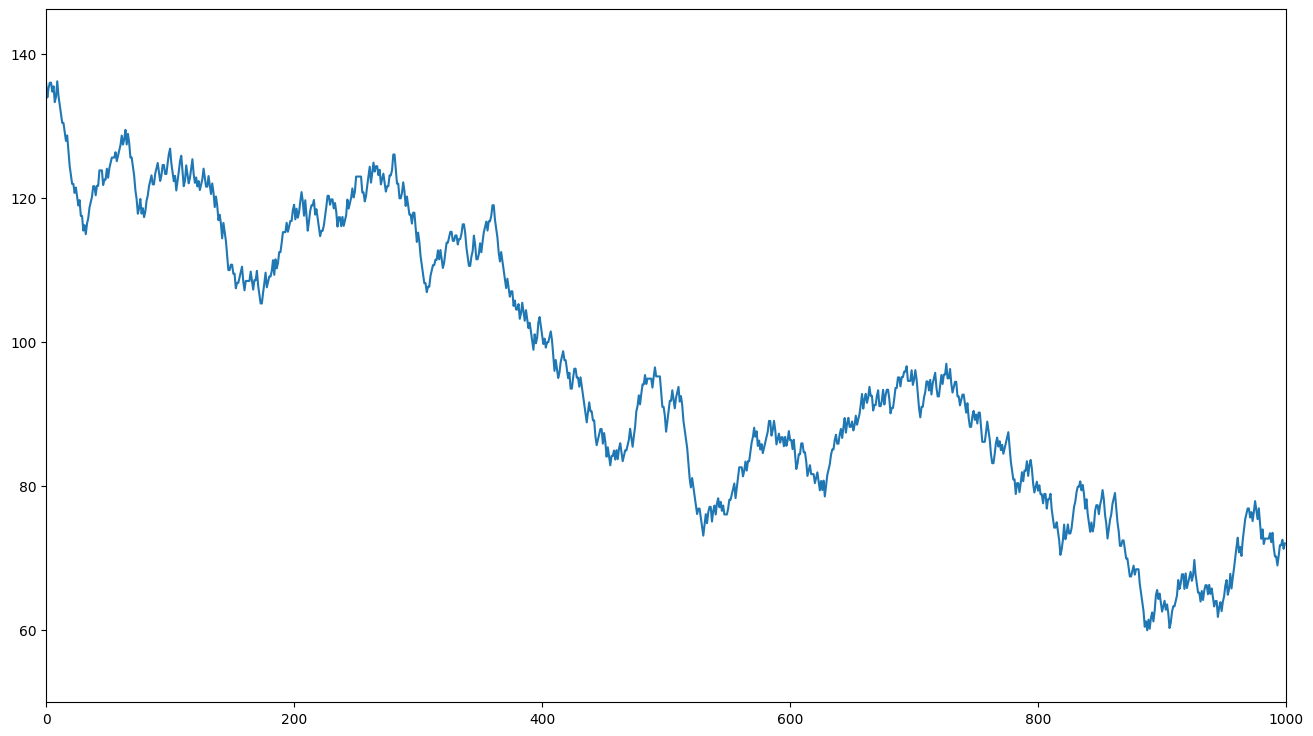

In [4796]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.set_xlim(xmin=0, xmax=size)
ax.set_ylim(ymin=random_walk.min() - 10, ymax=random_walk.max() + 10)
ax.plot(random_walk)

plt.show()

### Monte Carlo simulation

In [4797]:
rng = np.random.default_rng()

initial_point = rng.integers(low=35, high=150, size=1)

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 999]


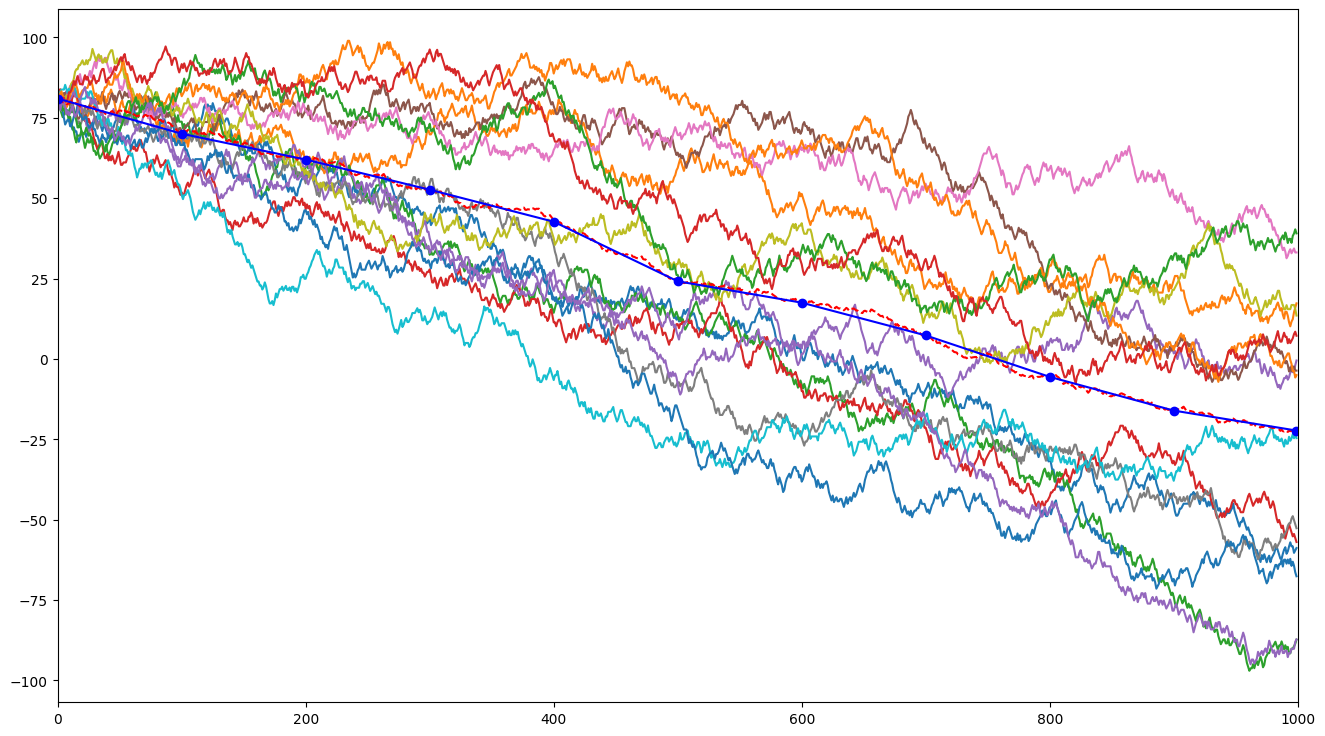

In [4798]:
n_simulations = 15
simulations = []
for simulation in range(n_simulations):
    senses = np.random.choice(a=sense, size=size, replace=True, p=sense_distribuition)

    _, counts = np.unique(senses, return_counts=True)

    magnitudes_minus_one = np.random.choice(a=magnitude_minus_one, size=counts[0], replace=True, p=magnitude_distribution_minus_one)
    magnitudes_zero = np.random.choice(a=magnitude_zero, size=counts[1], replace=True, p=magnitude_distribution_zero)
    magnitudes_plus_one = np.random.choice(a=magnitude_plus_one, size=counts[2], replace=True, p=magnitude_distribution_plus_one)

    magnitudes = np.zeros(shape=(len(senses)))

    magnitudes[(senses == -1)] = magnitudes_minus_one
    magnitudes[(senses == 0)] = magnitudes_zero
    magnitudes[(senses == 1)] = magnitudes_plus_one

    signed_magnitude = senses * magnitudes
    
    random_walk = signed_magnitude
    random_walk[0] = initial_point.item()
    random_walk = random_walk.cumsum()

    simulations.append(random_walk)

simulations = np.array(simulations, dtype=object)

figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.set_xlim(xmin=0, xmax=size)
for simulation in simulations:
    ax.plot(simulation)

ax.plot(np.mean(simulations, axis=0), '--r')

n_divisions = 10
step = size / n_divisions
positions = [round(i * step) for i in range(n_divisions)] + [size - 1]

print(positions)

ax.plot(positions, simulations[:, positions].mean(axis=0), '-ob')

plt.show()

### Random walk

Random walk com base linear

#### Components

#### Sense

In [4799]:
sense = [-1, 0, 1]

# sense_distribuition = [0.40, 0.15, 0.45]
sense_distribuition = None

#### Magnitude

-1

In [4800]:
magnitude_minus_one = [0.05, 0.075, 0.10]

# magnitude_distribution_minus_one = [0.70, 0.25, 0.05]
magnitude_distribution_minus_one = None

0

In [4801]:
magnitude_zero = [0]

# magnitude_distribution_zero = [1.00]
magnitude_distribution_zero = None

+1

In [4802]:
magnitude_plus_one = [0.05, 0.075, 0.10]

# magnitude_distribution_plus_one = [0.70, 0.25, 0.05]
magnitude_distribution_plus_one = None

#### Random walk with probability distribution

##### Size

In [4803]:
size = 1_000

##### Choice senses

In [4804]:
senses = np.random.choice(a=sense, size=size, replace=True, p=sense_distribuition)
senses[0:20]

array([ 1,  1,  0,  0,  0,  0,  0,  0,  1,  0, -1, -1,  1, -1,  0,  0,  0,
        0,  1,  0])

In [4805]:
# unique_values, counts = np.unique(senses, return_counts=True)
# counts/counts.sum()

##### Choice magnitudes

In [4806]:
_, counts = np.unique(senses, return_counts=True)

magnitudes_minus_one = np.random.choice(a=magnitude_minus_one, size=counts[0], replace=True, p=magnitude_distribution_minus_one)
magnitudes_zero = np.random.choice(a=magnitude_zero, size=counts[1], replace=True, p=magnitude_distribution_zero)
magnitudes_plus_one = np.random.choice(a=magnitude_plus_one, size=counts[2], replace=True, p=magnitude_distribution_plus_one)

In [4807]:
magnitudes = np.zeros(shape=(len(senses)))

magnitudes[(senses == -1)] = magnitudes_minus_one
magnitudes[(senses == 0)] = magnitudes_zero
magnitudes[(senses == 1)] = magnitudes_plus_one

magnitudes[0:20]

array([0.05 , 0.075, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.05 ,
       0.   , 0.1  , 0.075, 0.05 , 0.1  , 0.   , 0.   , 0.   , 0.   ,
       0.1  , 0.   ])

In [4808]:
# unique_values, counts = np.unique(magnitudes, return_counts=True)
# counts/counts.sum()

##### Signed magnitude

In [4809]:
signed_magnitude = senses * magnitudes
signed_magnitude[0:20]

array([ 0.05 ,  0.075,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.05 ,  0.   , -0.1  , -0.075,  0.05 , -0.1  ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.1  ,  0.   ])

##### Initial point

In [4810]:
rng = np.random.default_rng()

initial_point = rng.integers(low=35, high=150, size=1)
initial_point

array([83], dtype=int64)

##### Linear

In [4811]:
xa = 0
xb = size - 1

ya = initial_point.item()
yb = ya + 50

In [4812]:
linear = ya + (np.arange(size) - xa) / (xb - xa) * (yb - ya)
linear[0], linear[-1]

(83.0, 133.0)

##### Random walk com base linear

Percentual

In [4813]:
signed_magnitude = 1 + signed_magnitude
signed_magnitude = signed_magnitude.cumprod()
random_walk = linear * signed_magnitude

Absoluto

In [4814]:
# signed_magnitude = signed_magnitude.cumsum()
# random_walk = linear + signed_magnitude

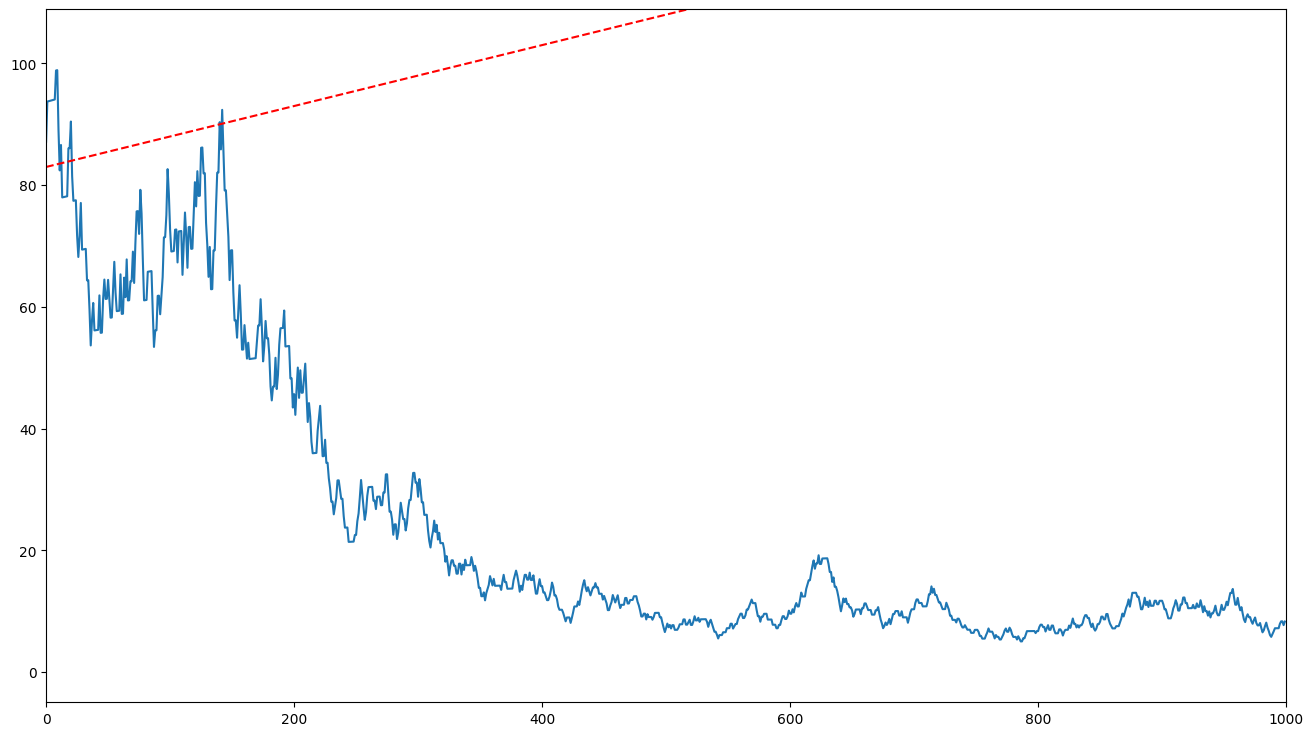

In [4815]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.set_xlim(xmin=0, xmax=size)
ax.set_ylim(ymin=random_walk.min() - 10, ymax=random_walk.max() + 10)
ax.plot(random_walk)
ax.plot(linear, '--r')

plt.show()

##### Random walk delimitado

In [4816]:
mean = ya + (yb - ya) / 2
values = [mean]

for index, sense in enumerate(senses):

    if sense > 0:
        value = values[index] + (yb - values[index]) * magnitudes[index]
    elif sense < 0:
        value = values[index] - (values[index] - ya) * magnitudes[index]
    else:
        value = values[index]
        
    values.append(value)

# ya, yb, values
ya, yb

(83, 133)

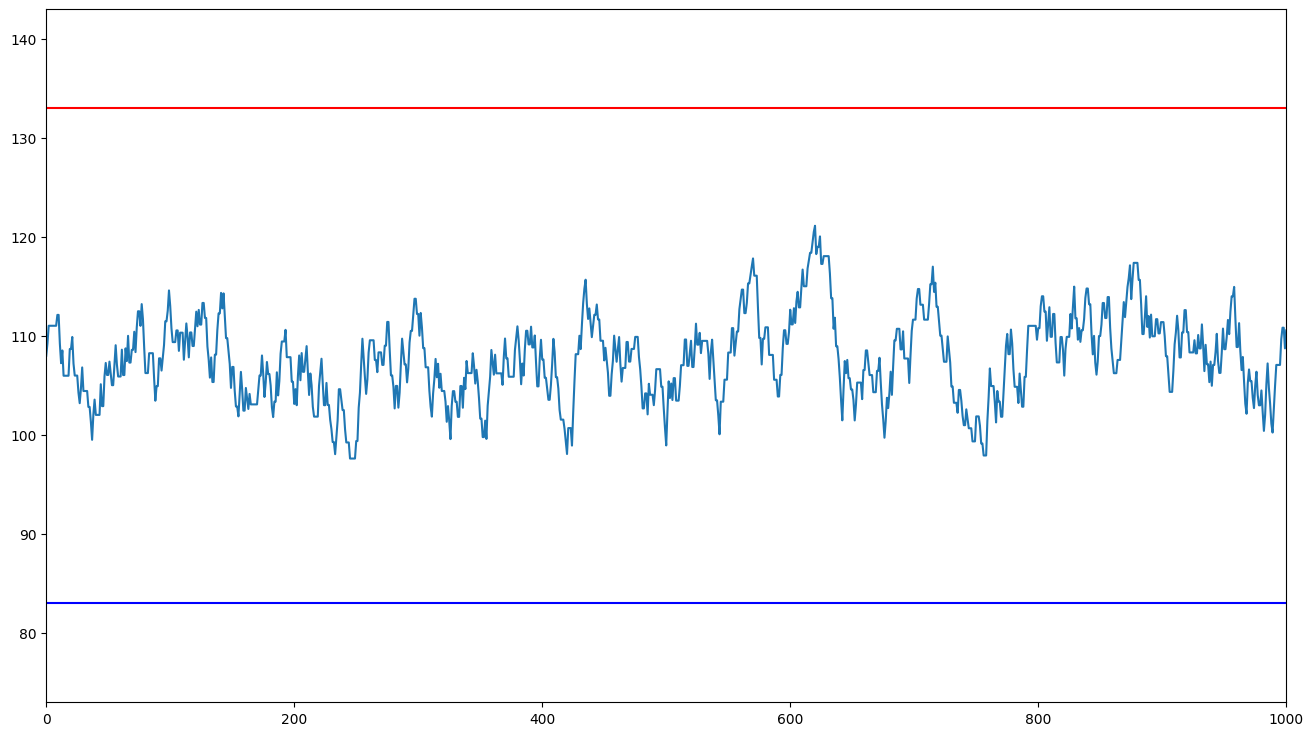

In [4817]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.set_xlim(xmin=0, xmax=size)
ax.set_ylim(ymin=ya - 10, ymax=yb + 10)
ax.axhline(yb, color='r')
ax.axhline(ya, color='b')
ax.plot(values)

plt.show()

##### Random walk em canal linear

In [4818]:
xa = 0
xb = size - 1

ya = initial_point.item()
yb = ya + 50

In [4819]:
linear = ya + (np.arange(size) - xa) / (xb - xa) * (yb - ya)
linear[0], linear[-1]

(83.0, 133.0)

In [4820]:
linear_yb = linear + 10
linear_ya = linear - 10

linear_ya[0], linear_yb[0], linear_ya[-1], linear_yb[-1]

(73.0, 93.0, 123.0, 143.0)

In [4821]:
values = [ya]

# linear_ya, linear_yb = np.roll(linear_ya, shift=-1, axis=0), np.roll(linear_yb, shift=-1, axis=0)
# linear_ya, linear_yb, senses = linear_ya[: -1], linear_yb[: -1], senses[: -1]

for index, sense in enumerate(senses):

    # print(index, values[index], linear_ya[index], linear_yb[index], sense, magnitudes[index])
    
    if index >= len(senses) - 1:
        break

    if sense > 0:
        value = values[index] + (linear_yb[index] - values[index]) * magnitudes[index]
    elif sense < 0:
        value = values[index] - (values[index] - linear_ya[index]) * magnitudes[index]
    else:
        value = values[index]

    # print('Anterior >', value)

    relative_position = (value - linear_ya[index]) / (linear_yb[index] - linear_ya[index])
    value = linear_ya[index + 1] + relative_position * (linear_yb[index + 1] - linear_ya[index + 1])

    # print('Interpolado >', value)

    values.append(value)

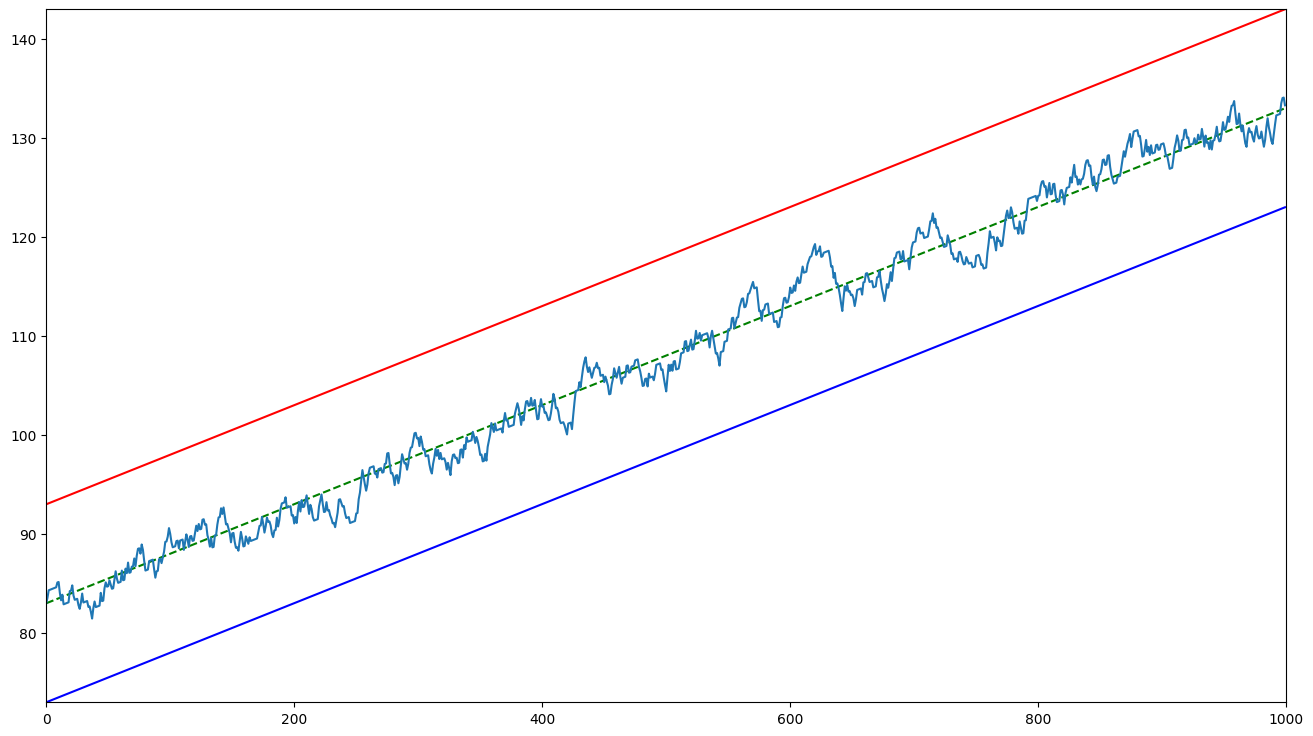

In [4822]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.set_xlim(xmin=0, xmax=size)
ax.set_ylim(ymin=ya - 10, ymax=yb + 10)
ax.plot(linear, '--g')
ax.plot(linear_yb, '-r')
ax.plot(linear_ya, '-b')
ax.plot(values)

plt.show()